## Hello Kaggler!
### Objective of this kernal is to explore basic visualizations using Titanic dataset

In [1]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import matplotlib.pyplot as plt
import seaborn as sns
import os

data=pd.read_csv('../input/train.csv')

### Column : Survival

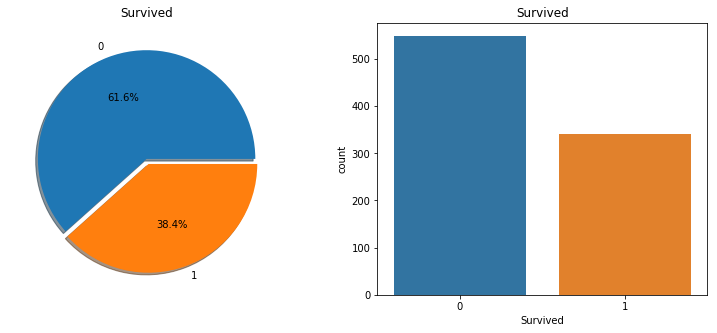

In [2]:
 f,ax=plt.subplots(1,2,figsize=(13,5))
data['Survived'].value_counts().plot.pie(explode=[0,0.05],autopct='%1.1f%%',ax=ax[0],shadow=True)
ax[0].set_title('Survived')
ax[0].set_ylabel('')
sns.countplot('Survived',data=data,ax=ax[1])
ax[1].set_title('Survived')
plt.show()

### Feature: Sex

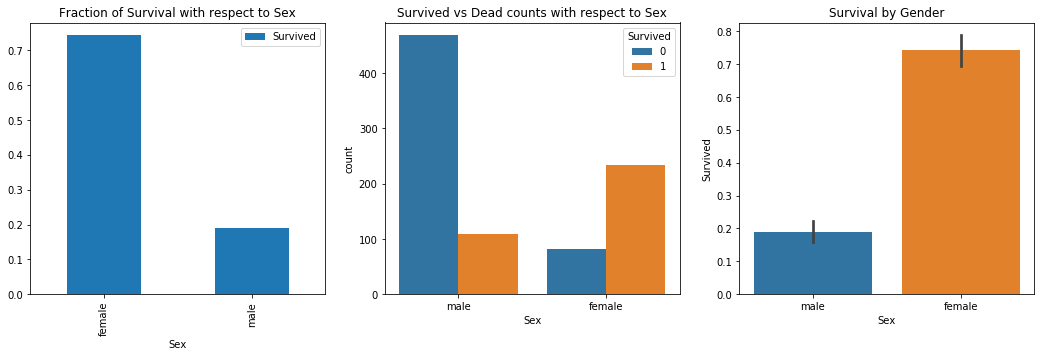

In [3]:
f,ax=plt.subplots(1,3,figsize=(18,5))
data[['Sex','Survived']].groupby(['Sex']).mean().plot.bar(ax=ax[0])
ax[0].set_title('Fraction of Survival with respect to Sex')
sns.countplot('Sex',hue='Survived',data=data,ax=ax[1])
ax[1].set_title('Survived vs Dead counts with respect to Sex')
sns.barplot(x="Sex", y="Survived", data=data,ax=ax[2])
ax[2].set_title('Survival by Gender')
plt.show()

### Feature: Pclass

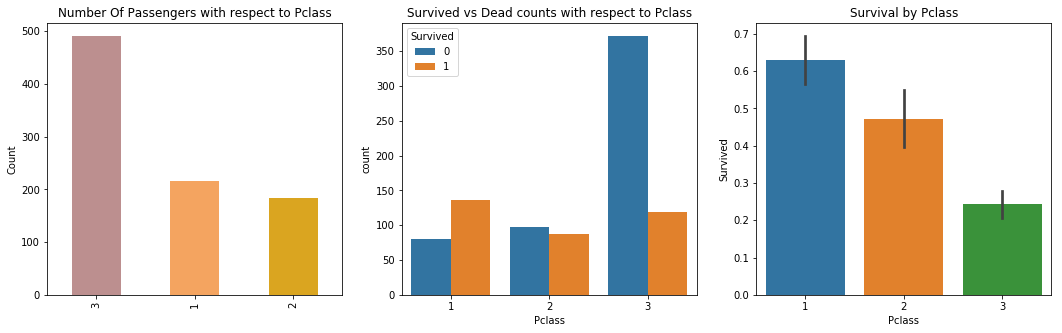

In [4]:
f,ax=plt.subplots(1,3,figsize=(18,5))
data['Pclass'].value_counts().plot.bar(color=['#BC8F8F','#F4A460','#DAA520'],ax=ax[0])
ax[0].set_title('Number Of Passengers with respect to Pclass')
ax[0].set_ylabel('Count')
sns.countplot('Pclass',hue='Survived',data=data,ax=ax[1])
ax[1].set_title('Survived vs Dead counts with respect to Pclass')
sns.barplot(x="Pclass", y="Survived", data=data,ax=ax[2])
ax[2].set_title('Survival by Pclass')
plt.show()

### Feature: Age

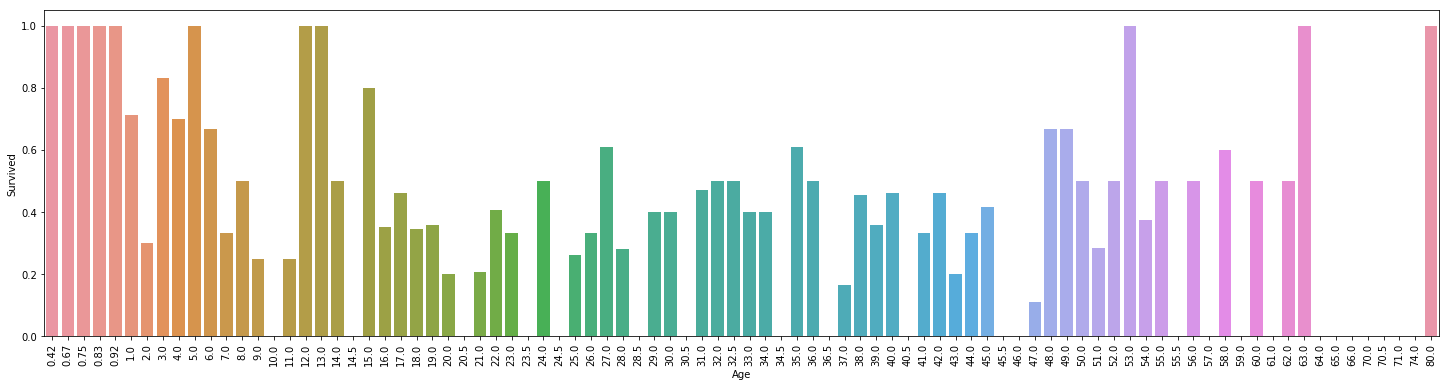

In [5]:
plt.figure(figsize=(25,6))
sns.barplot(data['Age'],data['Survived'], ci=None)
plt.xticks(rotation=90);

### Feature: Embarked

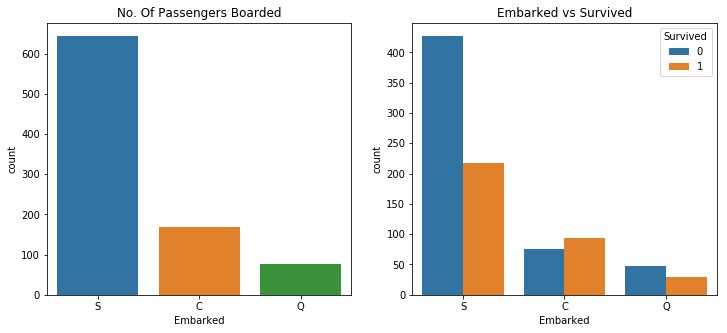

In [6]:
f,ax=plt.subplots(1,2,figsize=(12,5))
sns.countplot('Embarked',data=data,ax=ax[0])
ax[0].set_title('No. Of Passengers Boarded')
sns.countplot('Embarked',hue='Survived',data=data,ax=ax[1])
ax[1].set_title('Embarked vs Survived')
plt.subplots_adjust(wspace=0.2,hspace=0.5)
plt.show()

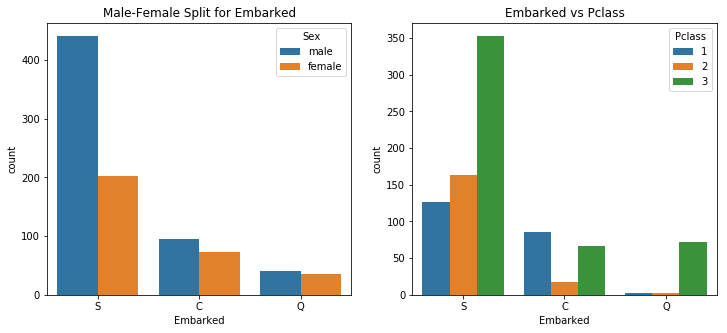

In [7]:
f,ax=plt.subplots(1,2,figsize=(12,5))
sns.countplot('Embarked',hue='Sex',data=data,ax=ax[0])
ax[0].set_title('Male-Female Split for Embarked')
sns.countplot('Embarked',hue='Pclass',data=data,ax=ax[1])
ax[1].set_title('Embarked vs Pclass')
plt.subplots_adjust(wspace=0.2,hspace=0.5)
plt.show()

### Features: SibSip & Parch

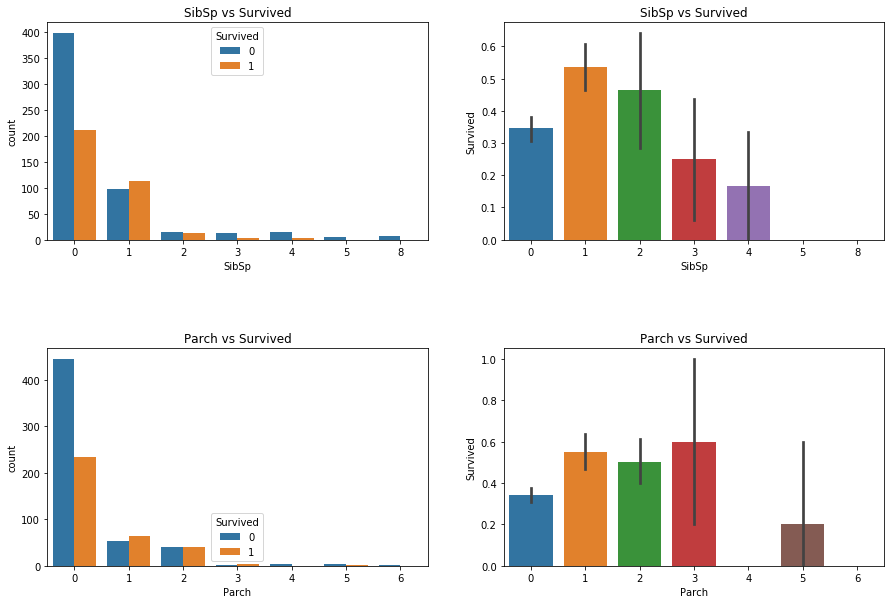

In [8]:
f,ax=plt.subplots(2,2,figsize=(15,10))
sns.countplot('SibSp',hue='Survived',data=data,ax=ax[0,0])
ax[0,0].set_title('SibSp vs Survived')
sns.barplot('SibSp','Survived',data=data,ax=ax[0,1])
ax[0,1].set_title('SibSp vs Survived')

sns.countplot('Parch',hue='Survived',data=data,ax=ax[1,0])
ax[1,0].set_title('Parch vs Survived')
sns.barplot('Parch','Survived',data=data,ax=ax[1,1])
ax[1,1].set_title('Parch vs Survived')

plt.subplots_adjust(wspace=0.2,hspace=0.5)
plt.show()

### Feature: Fare

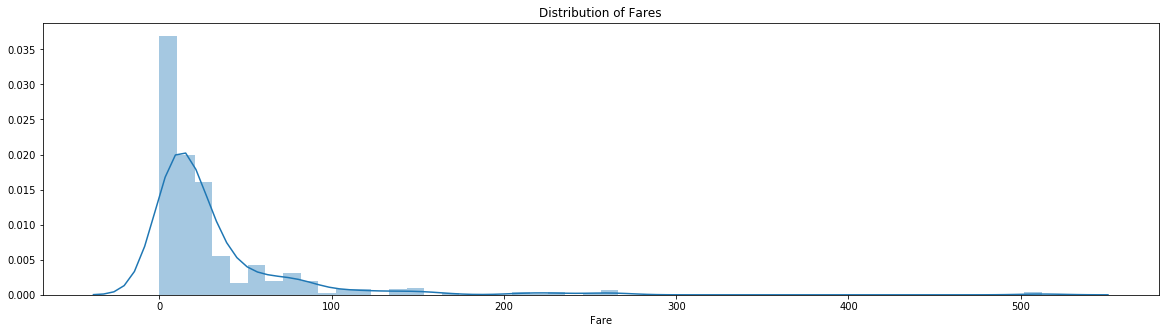

In [9]:
f,ax=plt.subplots(1,1,figsize=(20,5))
sns.distplot(data.Fare,ax=ax)
ax.set_title('Distribution of Fares')
plt.show()